<a href="https://colab.research.google.com/github/lualua0909/DeepLearning-LDS8/blob/main/DeThi/Cau5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 5: RNN - LSTM (1.5 điểm)
- Use AAPL.csv dataset or dowload from link https://finance.yahoo.com/quote/AAPL/history?period1=1479081600&period2=1605312000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
### Requirement:
- Build a model to predict the tomorrow's **Open** value based on the today's **Open** value.
- Build a model to predict the tomorrow's **Open** value based on the today's **Open, High, Low, Close, Adj Close, Volume**

In [40]:
import numpy
import matplotlib.pyplot as plt
import math
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
	#t
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
	#t+1
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [42]:
numpy.random.seed(7)
dataframe = pd.read_csv('https://raw.githubusercontent.com/lualua0909/DeepLearning-LDS8/main/Data/TSLA.csv', index_col=0)
dataframe.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-14,37.599998,37.650002,35.638000,36.290001,36.290001,32761000
2016-11-15,36.556000,37.285999,36.410000,36.754002,36.754002,19510000
2016-11-16,36.529999,36.945999,36.242001,36.785999,36.785999,17172000
2016-11-17,36.698002,37.897999,36.422001,37.731998,37.731998,24435500
2016-11-18,38.130001,38.599998,37.000000,37.004002,37.004002,26051500


In [43]:
dataset = dataframe[['Open']]
dataset = dataset.values.astype('float32')

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [46]:
# train_size = 365 * 24 * 3 # chia theo năm
train_size = int(len(dataset) * 0.67) # chia theo tỷ lệ
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [47]:
testX.shape

(331, 1)

In [48]:
trainX.shape

(673, 1)

In [49]:
model = Sequential()
model.add(LSTM(32, input_shape=(1, look_back)))
model.add(Dense(1))

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 32)                4352      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [51]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.0001,
    patience=20,
    restore_best_weights=True
)

In [52]:
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY,
                    validation_data=(testX, testY),
                    epochs=50,
                    batch_size=128,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/50
6/6 [==============================] - 3s 109ms/step - loss: 0.0024 - val_loss: 0.1599
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.1476
Epoch 3/50
6/6 [==============================] - 0s 8ms/step - loss: 5.9149e-04 - val_loss: 0.1372
Epoch 4/50
6/6 [==============================] - 0s 8ms/step - loss: 3.7371e-04 - val_loss: 0.1296
Epoch 5/50
6/6 [==============================] - 0s 11ms/step - loss: 3.8850e-04 - val_loss: 0.1256
Epoch 6/50
6/6 [==============================] - 0s 10ms/step - loss: 4.1930e-04 - val_loss: 0.1248
Epoch 7/50
6/6 [==============================] - 0s 13ms/step - loss: 3.9401e-04 - val_loss: 0.1257
Epoch 8/50
6/6 [==============================] - 0s 10ms/step - loss: 3.5986e-04 - val_loss: 0.1270
Epoch 9/50
6/6 [==============================] - 0s 15ms/step - loss: 3.4946e-04 - val_loss: 0.1273
Epoch 10/50
6/6 [==============================] - 0s 11ms/step - loss: 3.4997e-04 - val_loss: 0.1264

In [53]:
history.history

{'loss': [0.0023534076754003763,
  0.0012186520034447312,
  0.0005914908833801746,
  0.0003737097722478211,
  0.0003884978941641748,
  0.00041929533472284675,
  0.00039400512469001114,
  0.00035985882277600467,
  0.0003494556585792452,
  0.0003499676240608096,
  0.0003471778763923794,
  0.0003398297412786633,
  0.00033574411645531654,
  0.0003314730420242995,
  0.0003271743771620095,
  0.0003228134592063725,
  0.0003184586821589619,
  0.00031420920277014375,
  0.0003096516302321106,
  0.00030493922531604767,
  0.0003005922771990299,
  0.0002954165975097567,
  0.0002901364932768047,
  0.0002848721924237907,
  0.0002796229673549533,
  0.00027399294776842,
  0.0002683189231902361,
  0.00026284190244041383,
  0.00025666237343102694,
  0.00025057370658032596,
  0.00024455800303258,
  0.00023828854318708181,
  0.00023196281108539551,
  0.00022582290694117546,
  0.0002189582010032609,
  0.0002118084958055988,
  0.0002057644014712423,
  0.00019879714818671346,
  0.0001910571299958974,
  0.0001

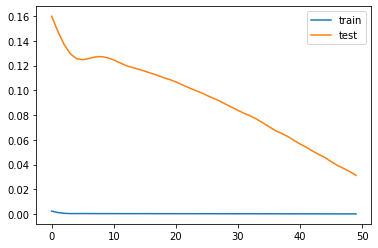

In [54]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [55]:
train_predict = model.predict(trainX)
test_predict= model.predict(testX)
train_predict = scaler.inverse_transform(train_predict)
trainY = scaler.inverse_transform([trainY])
test_predict = scaler.inverse_transform(test_predict)
testY = scaler.inverse_transform([testY])
trainY[0][:5]

array([36.55599881, 36.52999821, 36.69800233, 38.12999995, 37.00799957])

In [56]:
train_predict[:5]

array([[48.636032],
       [48.10616 ],
       [48.092964],
       [48.17821 ],
       [48.905163]], dtype=float32)

In [57]:
train_rmse = math.sqrt(mean_squared_error(trainY[0], train_predict[:,0]))
train_rmse

4.79524528872513

In [58]:
test_rmse = math.sqrt(mean_squared_error(testY[0], test_predict[:,0]))
test_rmse

82.39775418320559

In [59]:
train_mae = mean_absolute_error(trainY[0], train_predict[:,0])
test_mae = mean_absolute_error(testY[0], test_predict[:,0])

In [60]:
#Shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(dataset)-1, :] = test_predict

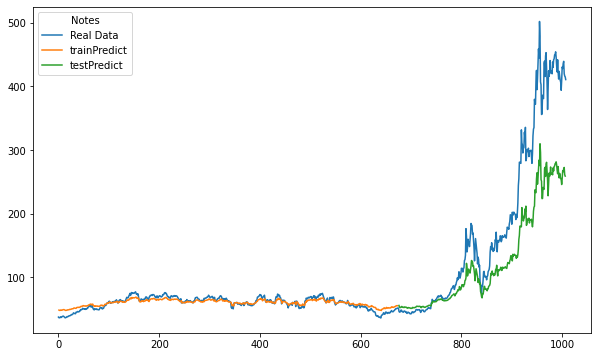

In [61]:
# plot baseline and predictions
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(dataset), label='Real Data')
plt.plot(trainPredictPlot, label='trainPredict')
plt.plot(testPredictPlot, label='testPredict')
plt.legend(title="Notes")
plt.show()